# Lecture 26 EEP118

## Time Series


   
1. How does Time series differ from cross sectional data

2.    Basic Static model

3.    Regression between two variables that have a trend – spurious correlation
    
4.    First differencing


Study ch 10 

Practice final and solutions posted









### Examples of Time Series Data we see every day


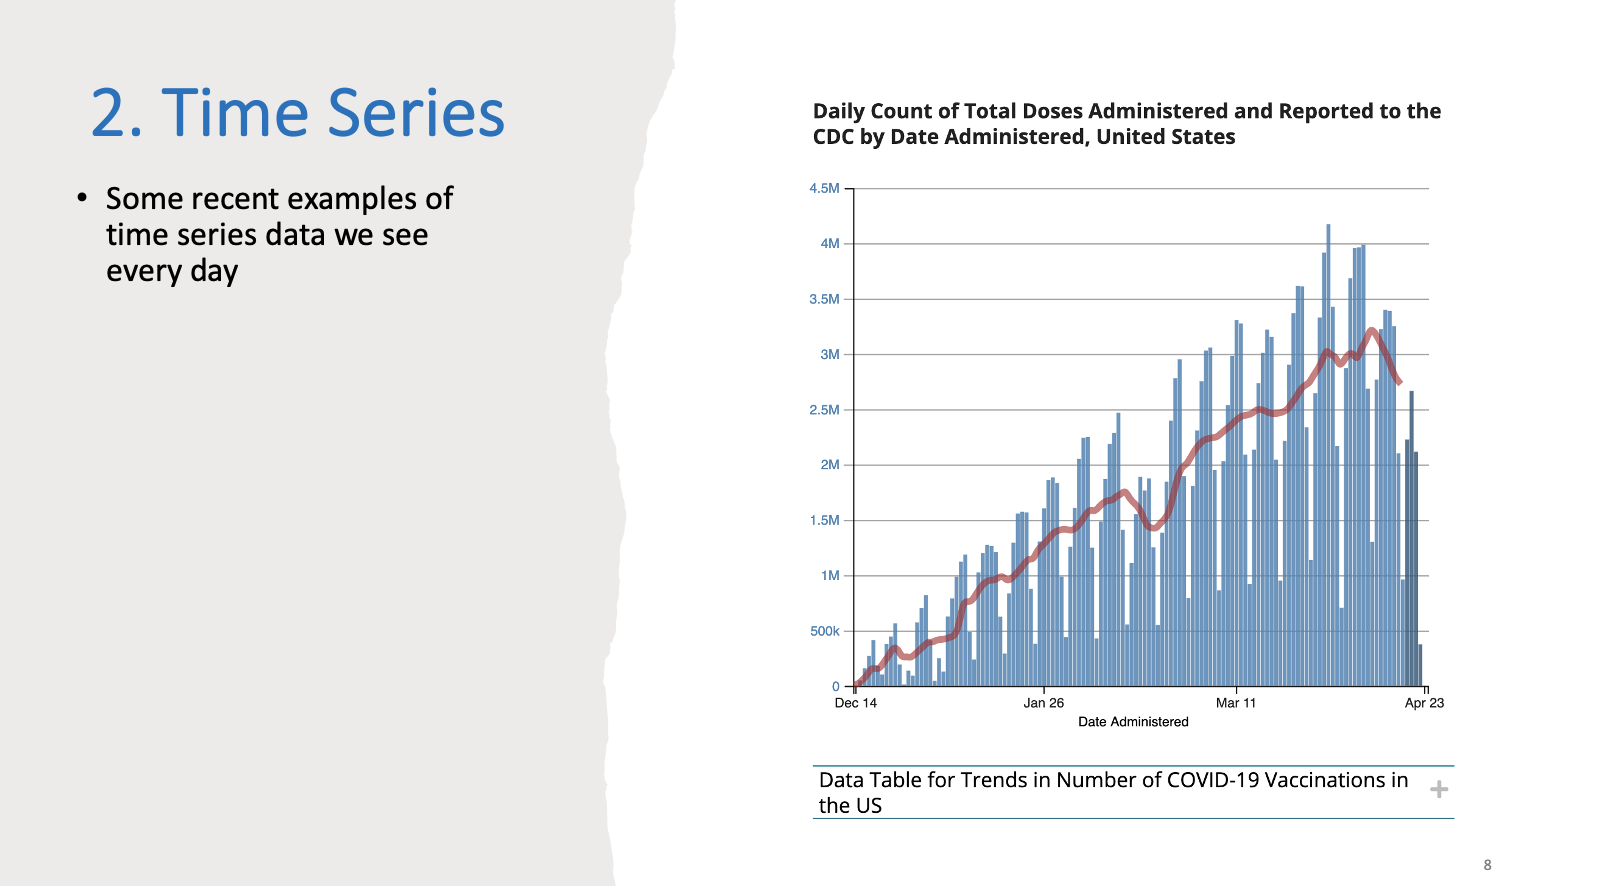

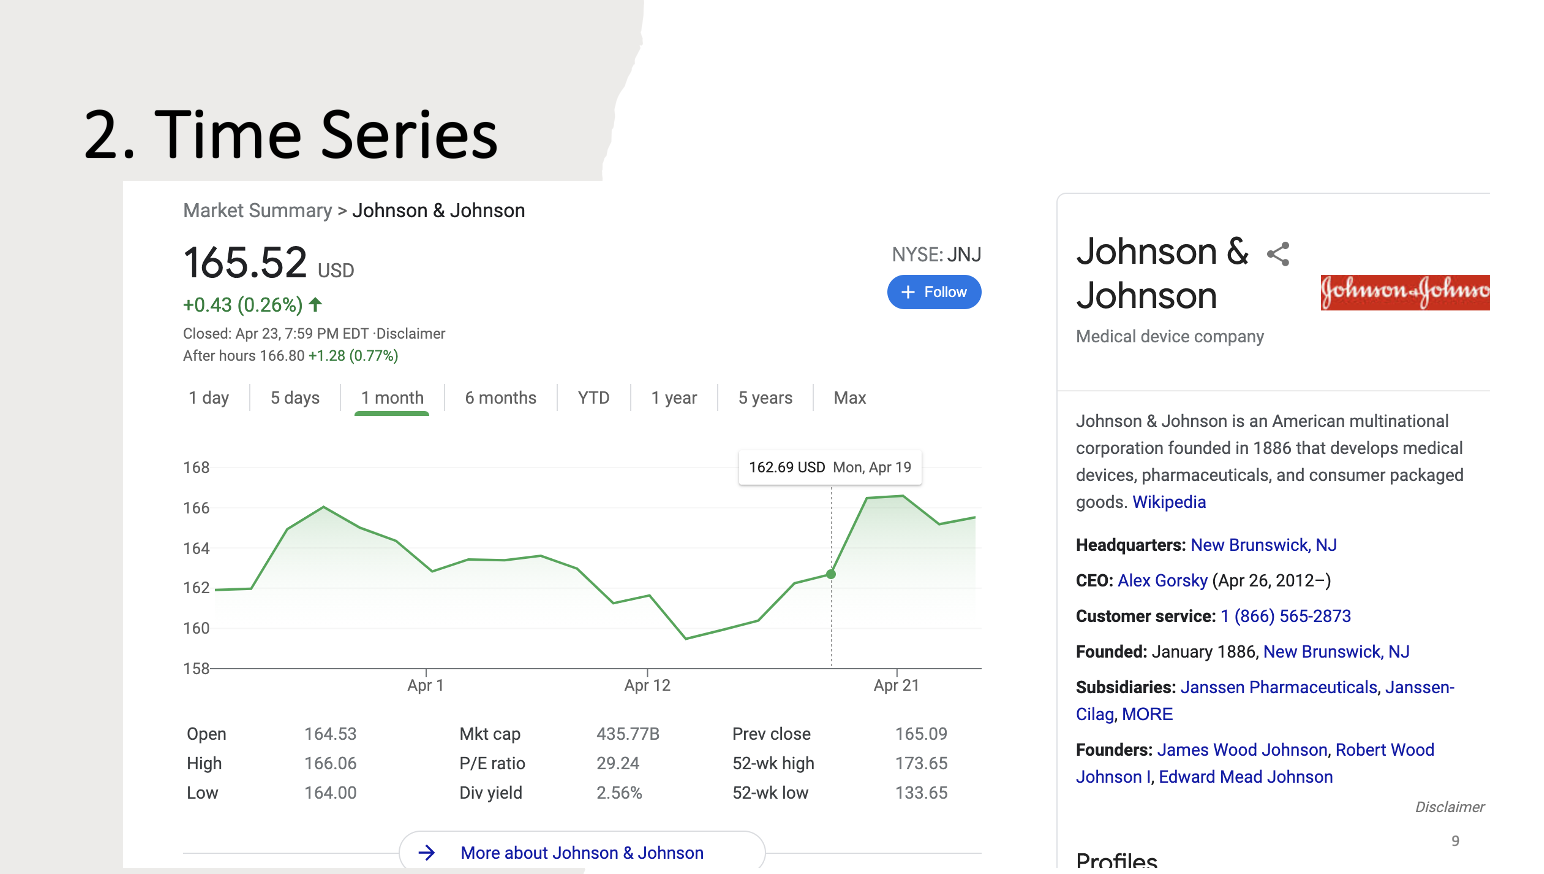

## How does Time Series Data differ from crosss sectional data?

Population is infinite and we only see one realization

MLR2 does not apply because successive time periods are not independent (y1,y2, … yt, … yT).

 Need to replace MLR2 with something equivalent


## Basic Static Model

All the effects take place within the same t

𝑤𝑎𝑔𝑒_𝑡= 𝛽_0+ 𝛽_1  𝑝𝑟𝑜𝑑𝑢𝑐𝑡𝑖𝑣𝑖𝑡𝑦_𝑡+ 𝑢_𝑡

Typical time series question: “Are wages related to labor productivity?”


Let us use a time series dataset from 1947-1987


In [1]:
#Lecture 26


# Load the 'pacman' package
library(pacman) 
#packages to use load them now using the pacman "manager"
p_load(dplyr, haven, readr) 
#Another great feature of p_load(): if you try to load a package that is not installed on your machine, p_load() install the package for you, rather than throwing an error. For instance, let’s install and load one final package named ggplot2. 
p_load(ggplot2,margins)


pacman::p_load(lfe, lmtest, haven, sandwich, tidyverse)
# lfe for running fixed effects regression
# lmtest for displaying robust SE in output table
# haven for loading in dta files
# sandwich for producing robust Var-Cov matrix
# tidyverse for manipulating data and producing plots




Source:  EARNS in Wooldridge. Economic Report of the President, 1989, Table B-47.  The data are for the nonfarm business sector.

   year   :                   1947 to 1987
   
   outphr :                   output per labor hour
   
   hrwage  :                  average real earnings / hour
   


In [2]:

# read in data
mydata <- read_dta("Lecture26EARNS.DTA")

# summarize data
summary(mydata) 


      year         wkearns         wkhours         outphr           hrwage     
 Min.   :1947   Min.   :123.4   Min.   :34.8   Min.   : 51.40   Min.   :3.065  
 1st Qu.:1957   1st Qu.:157.9   1st Qu.:36.0   1st Qu.: 66.50   1st Qu.:4.073  
 Median :1967   Median :171.3   Median :38.0   Median : 87.10   Median :4.830  
 Mean   :1967   Mean   :168.6   Mean   :37.6   Mean   : 82.91   Mean   :4.509  
 3rd Qu.:1977   3rd Qu.:184.8   3rd Qu.:39.0   3rd Qu.: 98.80   3rd Qu.:5.025  
 Max.   :1987   Max.   :198.4   Max.   :40.3   Max.   :109.00   Max.   :5.375  
                                                                               
    lhrwage         loutphr            t         ghrwage         
 Min.   :1.120   Min.   :3.940   Min.   : 1   Min.   :-0.048669  
 1st Qu.:1.404   1st Qu.:4.197   1st Qu.:11   1st Qu.: 0.003043  
 Median :1.575   Median :4.467   Median :21   Median : 0.013589  
 Mean   :1.494   Mean   :4.394   Mean   :21   Mean   : 0.011547  
 3rd Qu.:1.614   3rd Qu.:4.593

### Regression between two variables that have a trend: spurious correlation

Looking at observations before 1972, for productivity and for wages over time, on the left, both series in the two left graphs have a regular trend until 1970-80.

    
If you represent a scatter diagram hourly wage against labor productivity), you may have a spurious correlation:




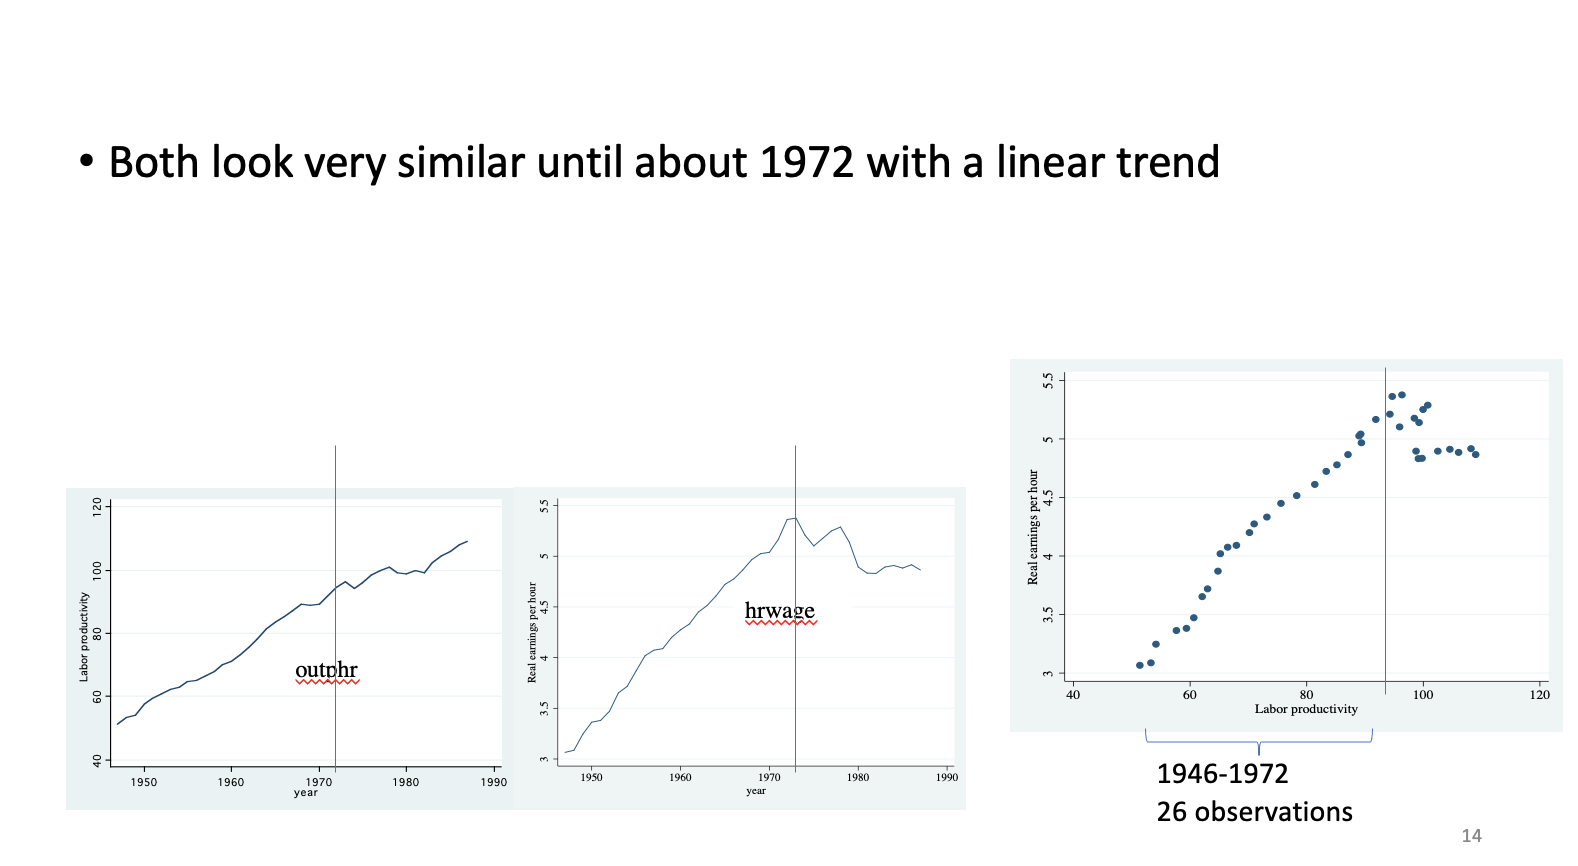


In [3]:
#regress hourly wage on productivity using only data up to 1972 including

reg1<-lm(hrwage~ outphr,mydata[mydata$year<=1972,])
summary(reg1)
   


Call:
lm(formula = hrwage ~ outphr, data = mydata[mydata$year <= 1972, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15208 -0.07159 -0.02181  0.08053  0.18871 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.492528   0.110093   4.474 0.000158 ***
outphr      0.051174   0.001494  34.253  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09886 on 24 degrees of freedom
Multiple R-squared:   0.98,	Adjusted R-squared:  0.9791 
F-statistic:  1173 on 1 and 24 DF,  p-value: < 2.2e-16


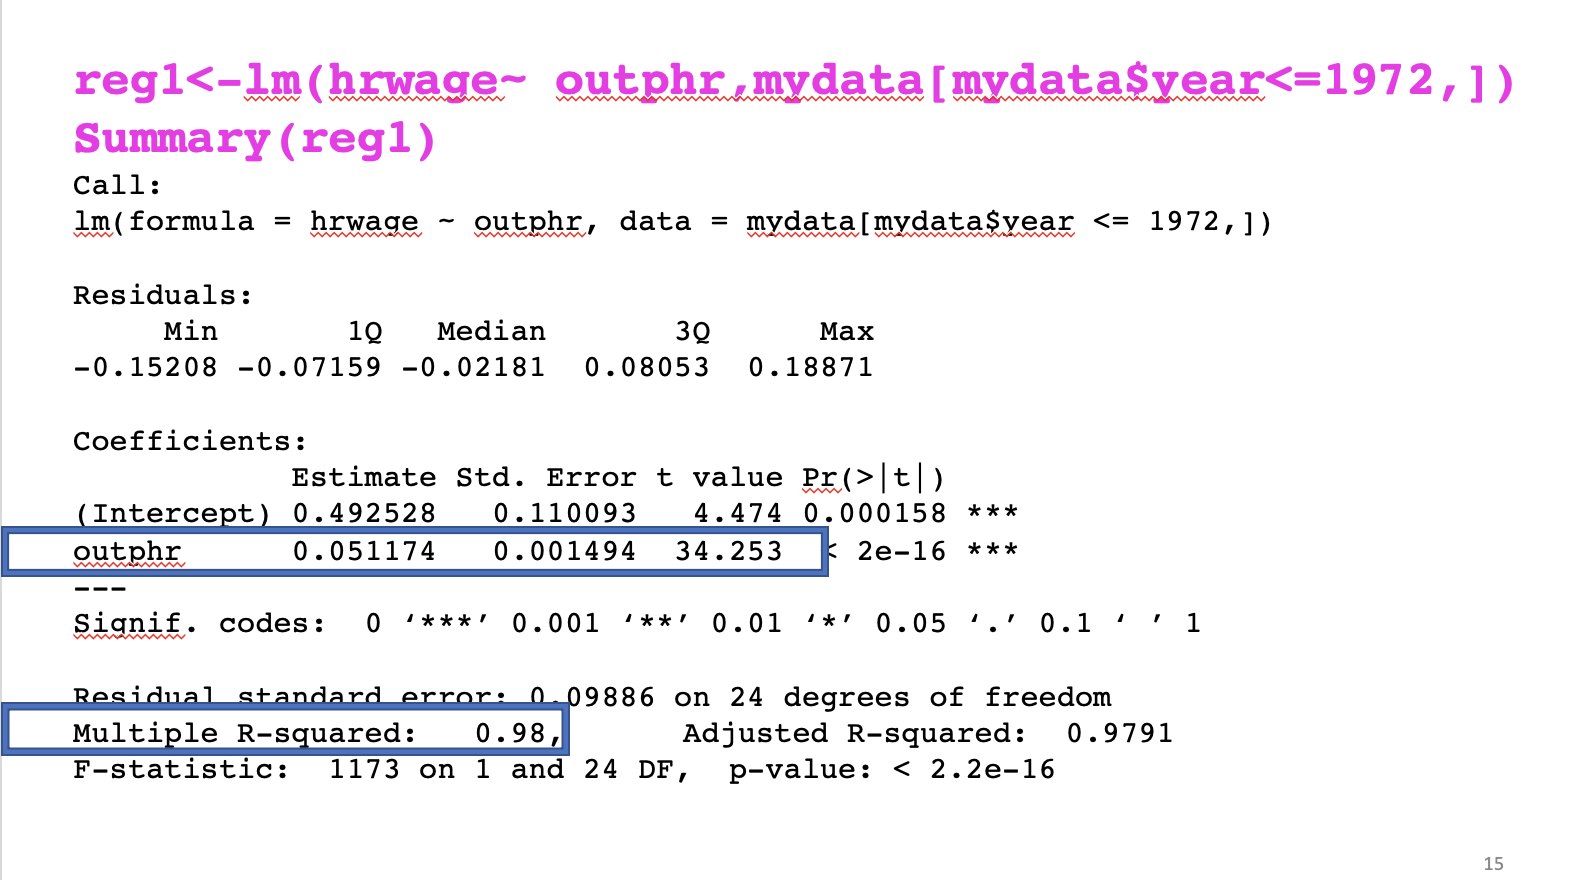

We are estimating a positive correlation and R squared of 98% !!!

a spurious correlation because both wage and output per hour have a linear trend as we saw in the picture


In [ ]:

#using all data now

reg2<-lm(hrwage~ outphr,mydata)
summary(reg2)


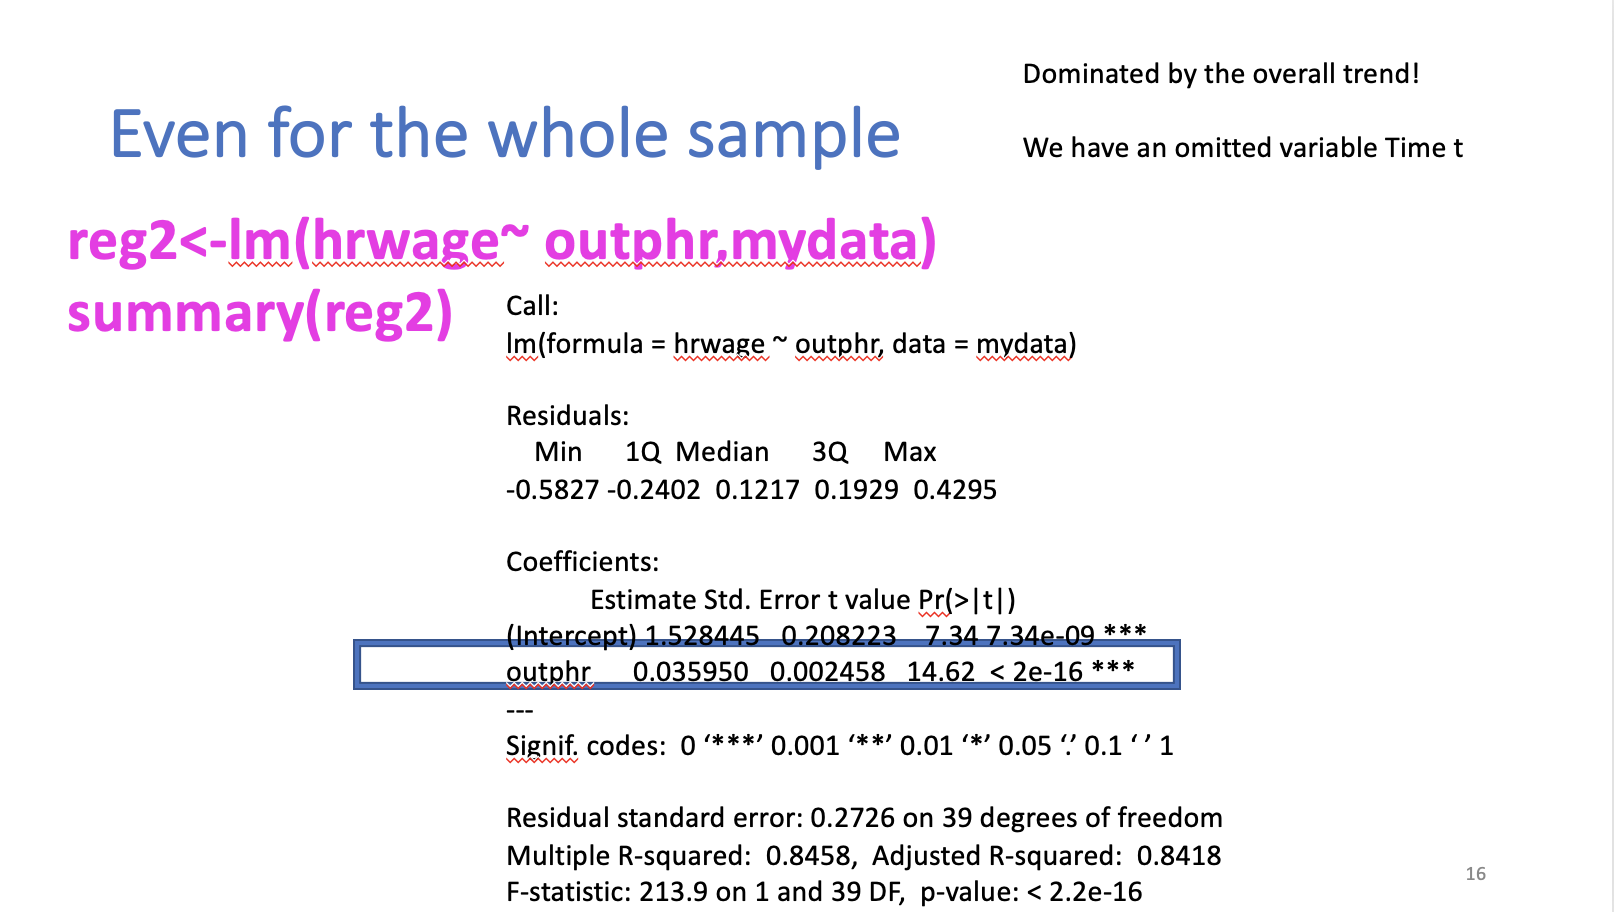

We are estimating a positive correlation and R squared of 84%  even using all data even after 1972!!!

a spurious correlation because both wage and output per hour have a linear trend as we saw in the picture


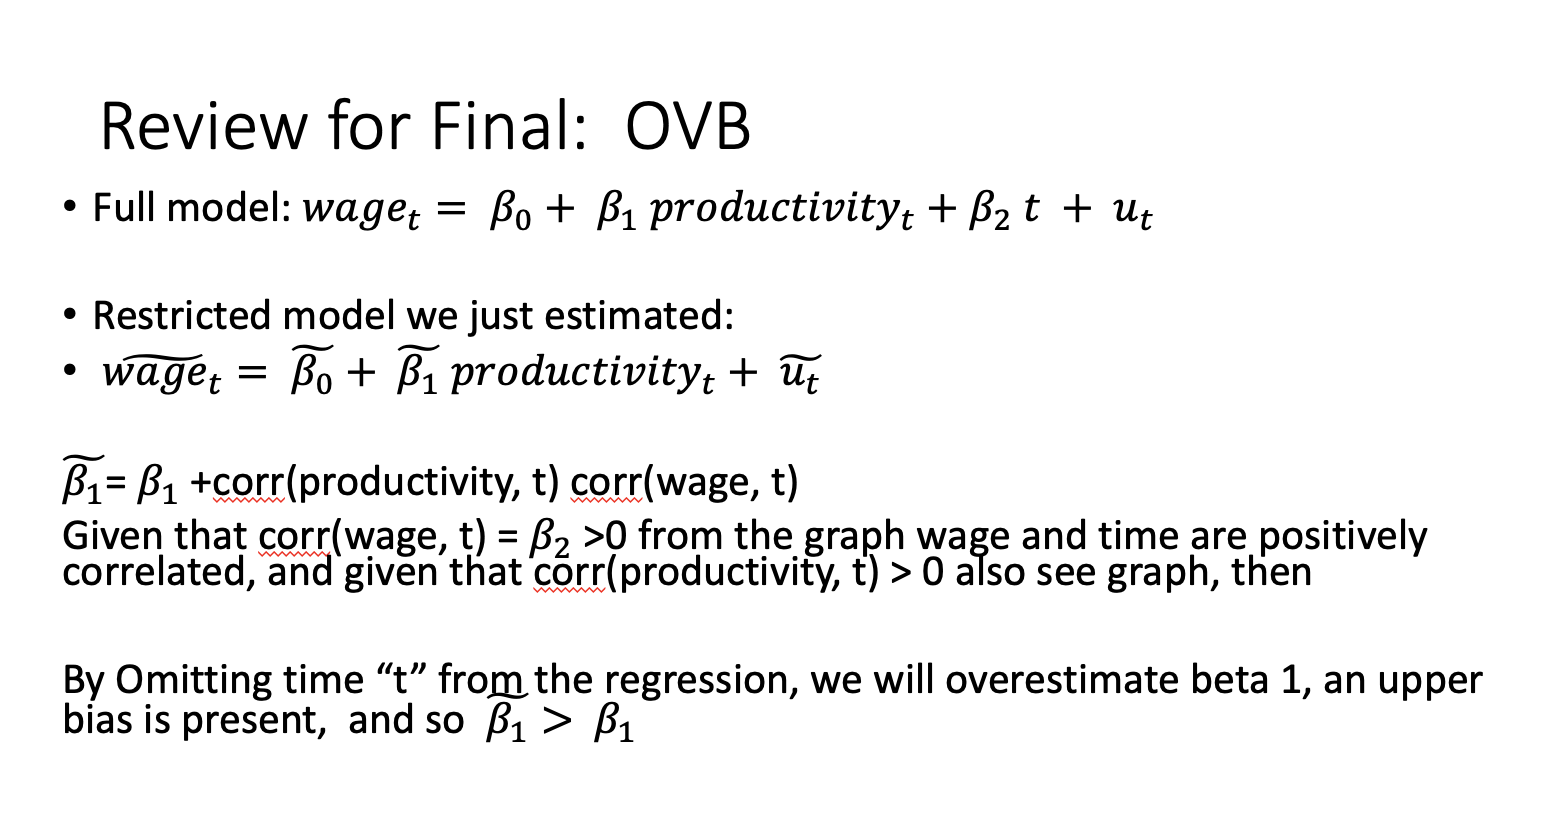

## We have an omitted variable, time   t  !

By Omitting time “t” from the regression, we will overestimate beta 1, an upper bias is present,  

and so  𝛽_1 tilde  >  𝛽_1  


In [4]:
#Method 1 : Controlling for time t
reg3<-lm(hrwage~outphr+t,mydata[mydata$year<=1972,])
summary(reg3)


Call:
lm(formula = hrwage ~ outphr + t, data = mydata[mydata$year <= 
    1972, ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.116596 -0.026215  0.004611  0.025773  0.111055 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.536654   0.391560   9.032 5.03e-09 ***
outphr      -0.010874   0.007931  -1.371    0.184    
t            0.107908   0.013724   7.863 5.76e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05259 on 23 degrees of freedom
Multiple R-squared:  0.9946,	Adjusted R-squared:  0.9941 
F-statistic:  2104 on 2 and 23 DF,  p-value: < 2.2e-16


Before omitting t beta1_hat= 𝛽_1 hat= 0.0511744  (see slide 8) 

By adding t beta1 hat will drop relative to beta1 hat tilde.

Change slide and see for yourself, now

Beta1hat is in the next slide -0.0108 < 0.0511 indeed


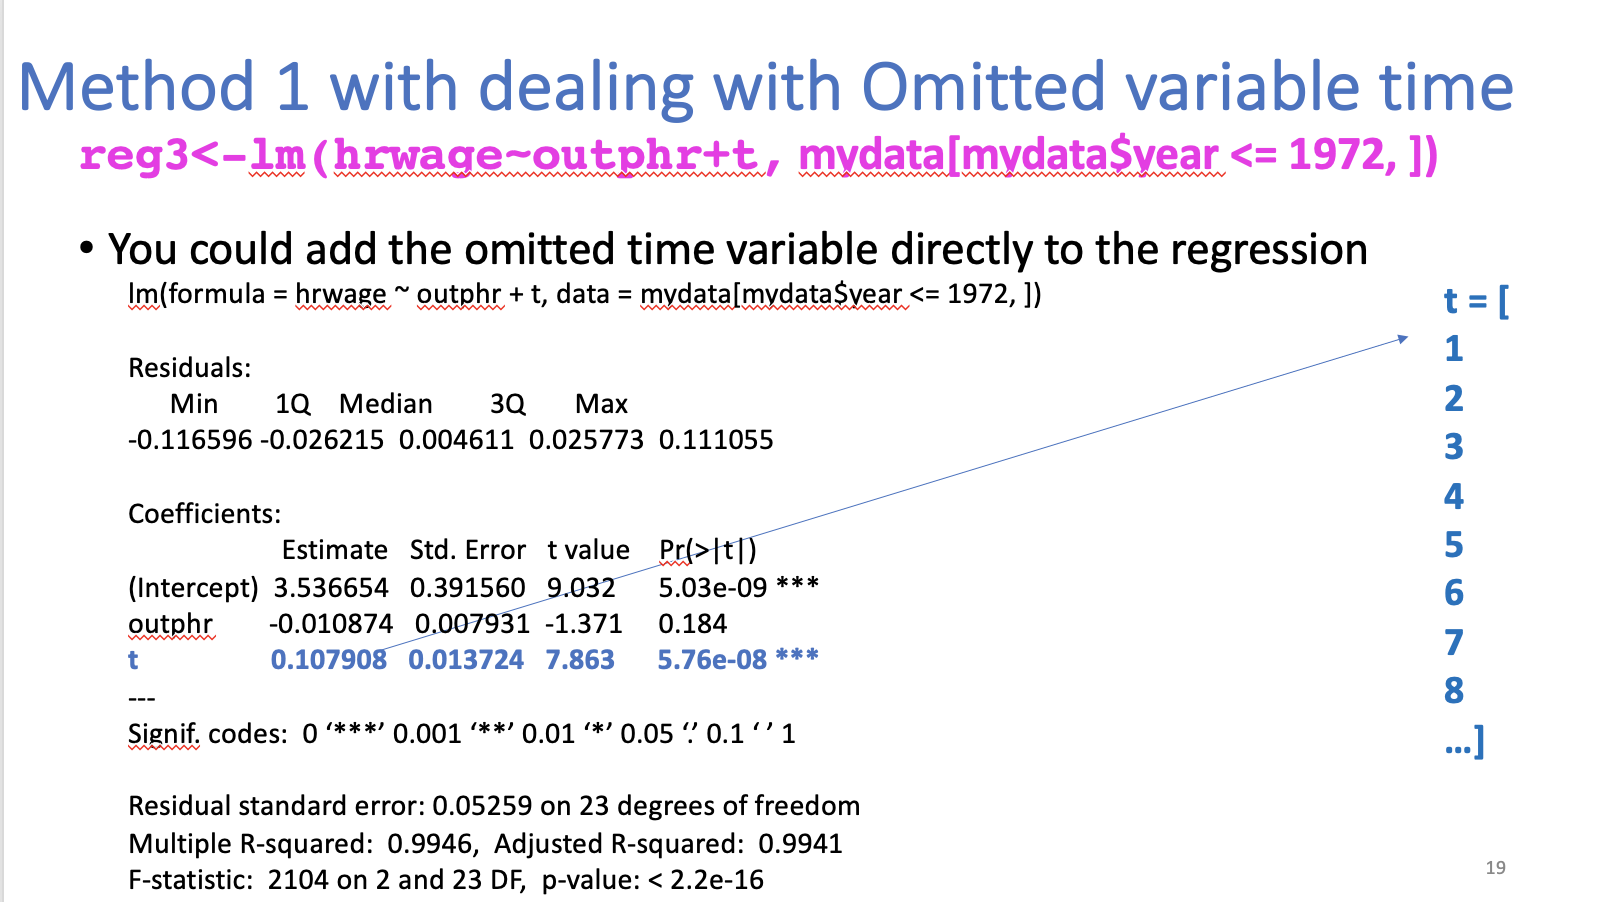

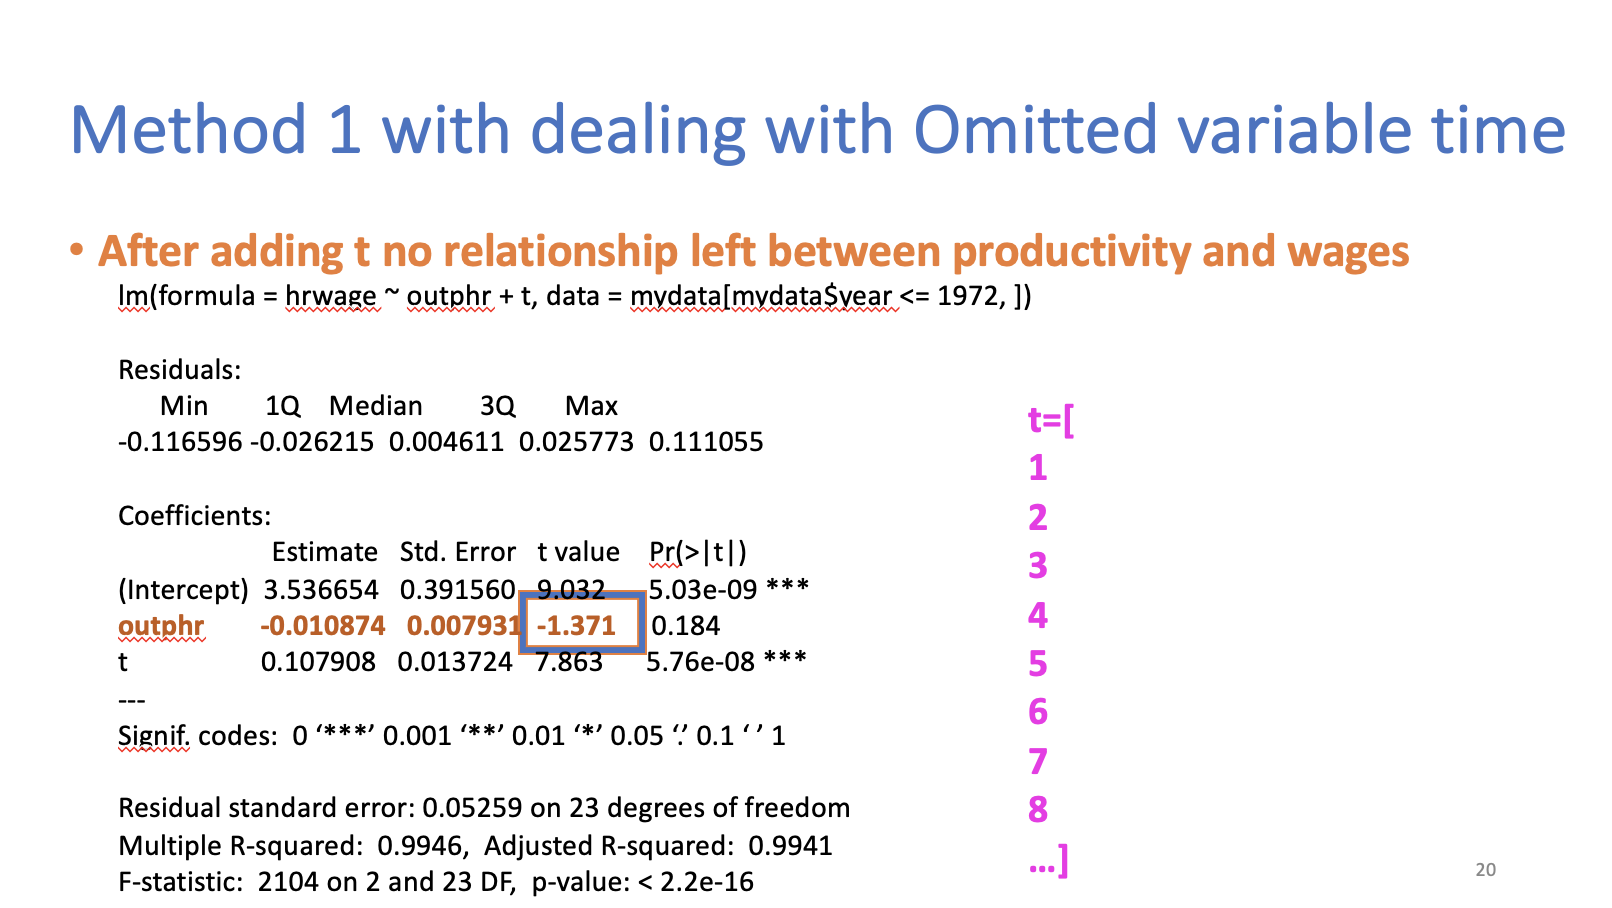

## Method 2 First Differencing


The general method is to use first differencing

This method works for any other trend, any other common variation over time that is not linear

That is why we only used years up to 1972 in method 1, only before 1972 was there a linear trend and therefore it would make sense to add t


The general method is to use first differencing

in R see if sorted t

#generate a first difference

mydata$dwage<-mydata$hrwage-lag(mydata$hrwage)

#1 missing value generated

mydata$doutphr=mydata$outphr-lag(mydata$outphr)

#also 1 missing val generated

And then run reg on the first differences instead of on the levels


In [6]:
#Method 2: first differencing


#sort t

#generate a first difference
mydata$dwage<-mydata$hrwage-lag(mydata$hrwage)
#one missing value generated


mydata$doutphr=mydata$outphr-lag(mydata$outphr)
#also for output per hour one missing value generated
#because the first period 1 has no period 0 to difference out


#see the data
head(mydata)

# and see that first observation of dwage is NA as is for doutphr


year,wkearns,wkhours,outphr,hrwage,lhrwage,loutphr,t,ghrwage,goutphr,ghrwge_1,goutph_1,goutph_2,lwkhours,dwage,doutphr
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1947,123.52,40.3,51.4,3.065012,1.120052,3.939638,1,NA,NA,NA,NA,NA,3.696352,NA,NA
1948,123.43,40.0,53.3,3.085750,1.126795,3.975936,2,0.006743193,0.03629827,NA,NA,NA,3.688879,0.02073765,1.8999977
1949,127.84,39.4,54.2,3.244670,1.177014,3.992681,3,0.050218821,0.01674461,0.006743193,0.03629827,NA,3.673766,0.15891981,0.9000015
1950,133.83,39.8,57.7,3.362563,1.212703,4.055257,4,0.035689831,0.06257629,0.050218821,0.01674461,0.03629827,3.683867,0.11789298,3.5000000
1951,134.87,39.9,59.4,3.380200,1.217935,4.084294,5,0.005231500,0.02903700,0.035689831,0.06257629,0.01674461,3.686376,0.01763725,1.7000008
1952,138.47,39.9,60.7,3.470426,1.244277,4.105944,6,0.026342392,0.02164936,0.005231500,0.02903700,0.06257629,3.686376,0.09022570,1.2999992


In [7]:
#regress the first differences using only data up to 1972
reg4<-lm(dwage~doutphr,mydata[mydata$year<=1972,])
summary(reg4)



Call:
lm(formula = dwage ~ doutphr, data = mydata[mydata$year <= 1972, 
    ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073834 -0.038284 -0.003681  0.017143  0.093104 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.06886    0.02200   3.131  0.00469 **
doutphr      0.01330    0.01126   1.181  0.24966   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05079 on 23 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.05718,	Adjusted R-squared:  0.01618 
F-statistic: 1.395 on 1 and 23 DF,  p-value: 0.2497


The general method is to use first differencing

INDEED up to 1972 nothing relating changes in wages to changes in productivity



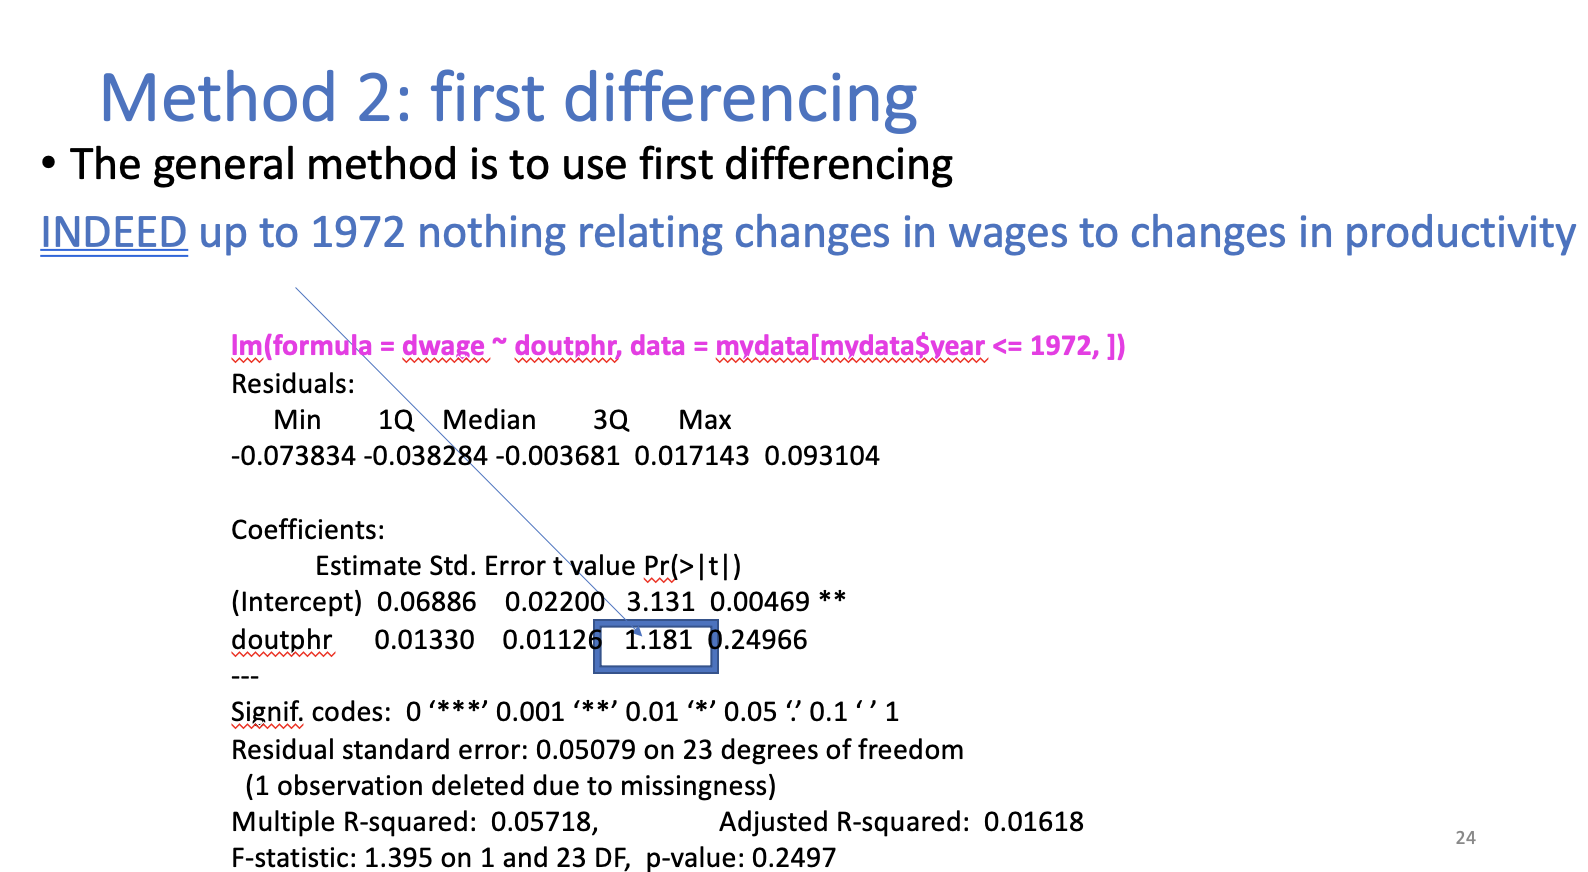

In [8]:
#regress the first differences all years
reg5<-lm(dwage~doutphr,mydata)
summary(reg5)


Call:
lm(formula = dwage ~ doutphr, data = mydata)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.199185 -0.044477  0.004589  0.042674  0.152055 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.021709   0.018509  -1.173    0.248    
doutphr      0.046314   0.009854   4.700 3.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07516 on 38 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.3676,	Adjusted R-squared:  0.351 
F-statistic: 22.09 on 1 and 38 DF,  p-value: 3.373e-05


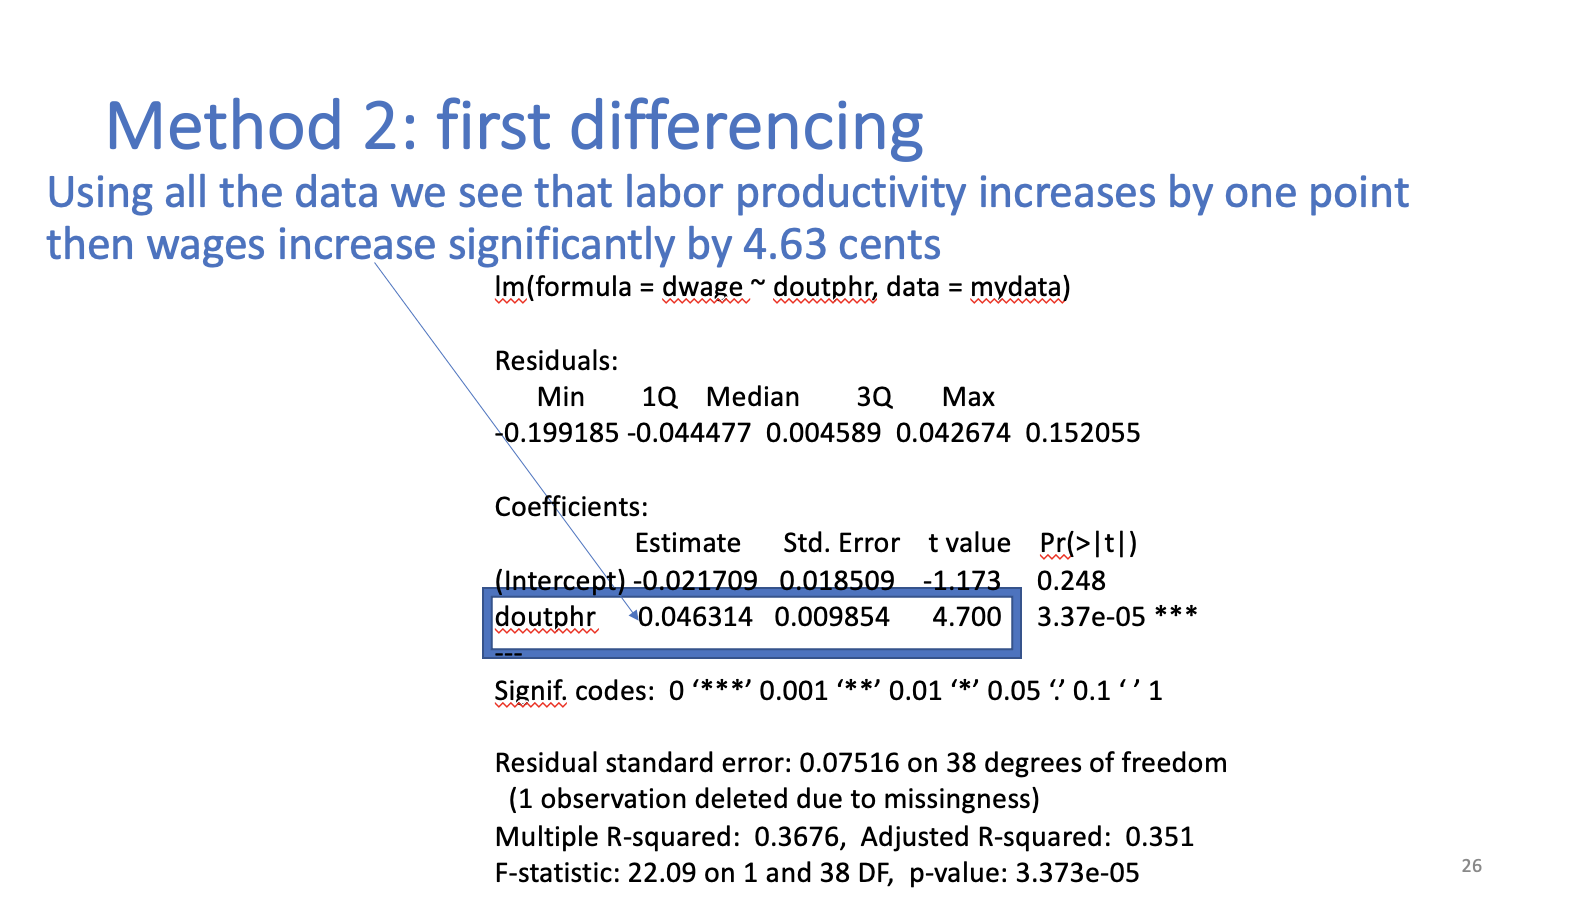

## Not covered in EEP 118

Assumptions of Time Series Reg Models and properties of OLS

Test whether you need to first difference or not

Serial correlation
